In [5]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from datetime import datetime as dt
import fiona
from fiona.crs import from_epsg
from shapely.geometry import Point, mapping
import os
import rasterio
import matplotlib

In [6]:
guatemala_dir = '/mnt/uksa-storage/guatemala/'
data_population = f'{guatemala_dir}urban'
kms_per_radian = 6371.0088

In [7]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

def dbscan_reduce(df, epsilon, x='lon', y='lat'):
    start_time = time.time()
    # represent points consistently as (lat, lon) and convert to radians to fit using haversine metric
    # coords = df.as_matrix(columns=[y, x])    
    coords = df[[y, x]].values    
    db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    print('Number of clusters: {:,}'.format(num_clusters))
    
    clustered = pd.DataFrame(coords)
    clustered.columns = [y,x]
    clustered['cluster'] = cluster_labels

    
    return clustered

def visualise(df_clustered):
    cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
    fig, ax = plt.subplots(figsize=[10, 6])
    rs_scatter = ax.scatter(df_clustered['lon'], df_clustered['lat'], c=df_clustered['cluster'],cmap=cmap, edgecolor='None', alpha=0.7, s=1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

In [8]:
os.chdir('/mnt/uksa-storage/ESA_landuse')

In [9]:
os.listdir()

['ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992_2015-v2.0.7.zip',
 'scratch',
 'README.md',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992_2015-v2.0.7_gtm.tif',
 'urban_2000.tif',
 'urban_2001.tif',
 'urban_2002.tif',
 'urban_2003.tif',
 'urban_2004.tif',
 'urban_2005.tif',
 'urban_2006.tif',
 'urban_2007.tif',
 'urban_2008.tif',
 'urban_2009.tif',
 'urban_2010.tif',
 'urban_2011.tif',
 'urban_2012.tif',
 'urban_2013.tif',
 'urban_2014.tif',
 'urban_2015.tif',
 'tmp',
 'gdal2xyz.py',
 'urban_cluster_over_20_cells_year_2011.tif',
 'urban_cluster_over_50_cells_year_2011.tif',
 'urban_cluster_over_100_cells_year_2011.tif',
 'urban_cluster_over_200_cells_year_2011.tif',
 'urban_cluster_over_10_cells_year_2015.tif',
 'urban_cluster_over_20_cells_year_2015.tif',
 'urban_cluster_over_50_cells_year_2015.tif',
 'urban_cluster_over_100_cells_year_2015.tif',
 'urban_cluster_over_200_cells_year_2015.tif',
 'urban_cluster_over_10_cells_year_2001.tif',
 'urban_cluster_over_20_cells_year_2001.tif',
 'urban_cluster_over

In [26]:
rasterio.open('ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992_2015-v2.0.7_gtm.tif').profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 1447, 'height': 1469, 'count': 24, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.002777294360055317, 0.0, -92.24024247099999,
       0.0, -0.002777406371000677, 17.819453371000066), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

In [27]:
for y in range(2000,2015 + 1):
    band  = y - 1992 + 1
    calc_command = "gdal_calc.py --A_band={} -A ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992_2015-v2.0.7_gtm.tif --calc='A==190' --outfile=urban_{}.tif --type=Byte --NoDataValue=0".format(band,y)
    os.system(calc_command)
    
# Write out the coordinates of the pixels non zero data 
for y in range(2000, 2015 + 1):
    gdal2xyz_command = "./gdal2xyz.py -band 1 urban_{}.tif -csv > tmp/urban_{}_coords.txt".format(y,y)
    print(gdal2xyz_command)
    os.system(gdal2xyz_command)

./gdal2xyz.py -band 1 urban_2000.tif -csv > tmp/urban_2000_coords.txt
./gdal2xyz.py -band 1 urban_2001.tif -csv > tmp/urban_2001_coords.txt
./gdal2xyz.py -band 1 urban_2002.tif -csv > tmp/urban_2002_coords.txt
./gdal2xyz.py -band 1 urban_2003.tif -csv > tmp/urban_2003_coords.txt
./gdal2xyz.py -band 1 urban_2004.tif -csv > tmp/urban_2004_coords.txt
./gdal2xyz.py -band 1 urban_2005.tif -csv > tmp/urban_2005_coords.txt
./gdal2xyz.py -band 1 urban_2006.tif -csv > tmp/urban_2006_coords.txt
./gdal2xyz.py -band 1 urban_2007.tif -csv > tmp/urban_2007_coords.txt
./gdal2xyz.py -band 1 urban_2008.tif -csv > tmp/urban_2008_coords.txt
./gdal2xyz.py -band 1 urban_2009.tif -csv > tmp/urban_2009_coords.txt
./gdal2xyz.py -band 1 urban_2010.tif -csv > tmp/urban_2010_coords.txt
./gdal2xyz.py -band 1 urban_2011.tif -csv > tmp/urban_2011_coords.txt
./gdal2xyz.py -band 1 urban_2012.tif -csv > tmp/urban_2012_coords.txt
./gdal2xyz.py -band 1 urban_2013.tif -csv > tmp/urban_2013_coords.txt
./gdal2xyz.py -band 

Number of clusters: 439


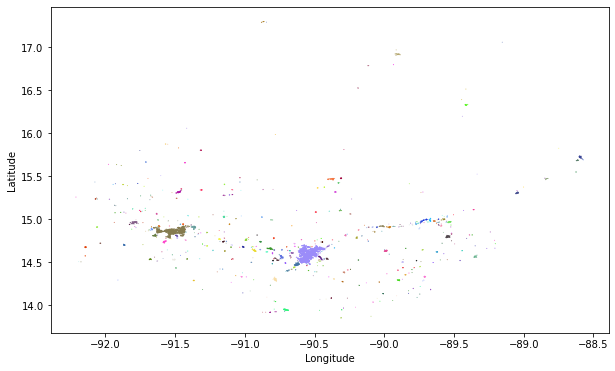

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_10_cells_year_2001.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_10_cells_year_2001.tif.
Copying nodata values from source tmp/urban_cluster_over_10_cells_year_2001.tif to destination urban_cluster_over_10_cells_year_2001.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_20_cells_year_2001.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_20_cells_year_2001.tif.
Copying nodata values from source tmp/urban_cluster_over_20_cells_year_2001.

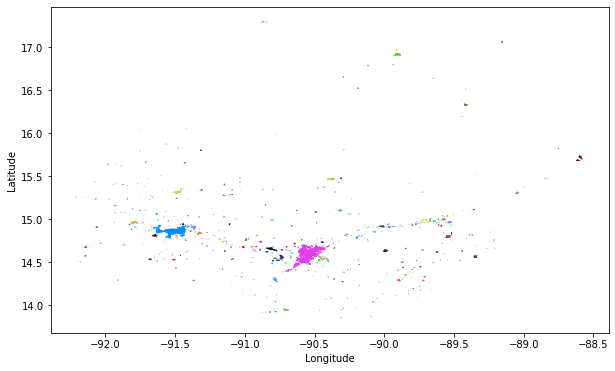

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_10_cells_year_2006.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_10_cells_year_2006.tif.
Copying nodata values from source tmp/urban_cluster_over_10_cells_year_2006.tif to destination urban_cluster_over_10_cells_year_2006.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_20_cells_year_2006.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_20_cells_year_2006.tif.
Copying nodata values from source tmp/urban_cluster_over_20_cells_year_2006.

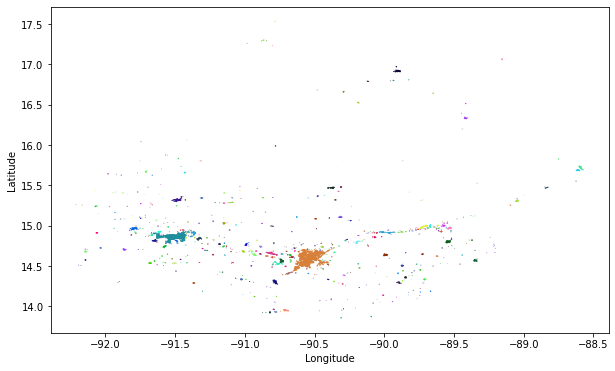

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_10_cells_year_2011.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_10_cells_year_2011.tif.
Copying nodata values from source tmp/urban_cluster_over_10_cells_year_2011.tif to destination urban_cluster_over_10_cells_year_2011.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_20_cells_year_2011.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_20_cells_year_2011.tif.
Copying nodata values from source tmp/urban_cluster_over_20_cells_year_2011.

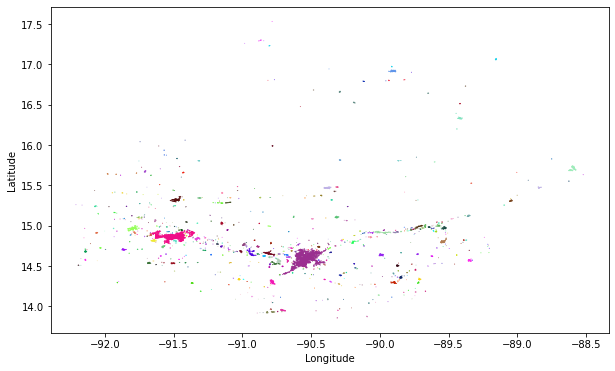

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_10_cells_year_2015.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_10_cells_year_2015.tif.
Copying nodata values from source tmp/urban_cluster_over_10_cells_year_2015.tif to destination urban_cluster_over_10_cells_year_2015.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 10904P x 11480L.
Processing input file tmp/urban_cluster_over_20_cells_year_2015.tif.
Using internal nodata values (e.g. 0) for image tmp/urban_cluster_over_20_cells_year_2015.tif.
Copying nodata values from source tmp/urban_cluster_over_20_cells_year_2015.

In [52]:
#Do clustering
def visualise(df_clustered):
    cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
    fig, ax = plt.subplots(figsize=[10, 6])
    rs_scatter = ax.scatter(df_clustered['lon'], df_clustered['lat'], c=df_clustered['cluster'],cmap=cmap, edgecolor='None', alpha=0.7, s=1)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()
    
for year in [2001,2006,2011,2015]:
    os.makedirs('tmp/{}'.format(year), exist_ok=True)
    df_gps = pd.read_csv('tmp/urban_{}_coords.txt'.format(year), names = ['lon','lat','on'])
    df_gps.head()
    df_gps=df_gps[df_gps['on']==1]

    eps_rad = 1 / kms_per_radian
    df_clustered = dbscan_reduce(df_gps, epsilon=eps_rad)

    #Add a column of the number of cells in each cluster
    df_clustered['cells'] = df_clustered['lat'].groupby(df_clustered['cluster']).transform('count')


    #Write to CSV
    df_clustered = df_clustered.sort_values(by=['lat', 'lon'])
    df_clustered.to_csv('tmp/urban_{}_clustered.csv'.format(year), index = False)

    visualise(df_clustered)
    
    #Create various filtered data frames

    df_clusters_over_10_cells = df_clustered.loc[df_clustered['cells'] >= 10].sort_values(by=['lat', 'lon'])
    df_clusters_over_20_cells = df_clustered.loc[df_clustered['cells'] >= 20].sort_values(by=['lat', 'lon'])
    df_clusters_over_50_cells = df_clustered.loc[df_clustered['cells'] >= 50].sort_values(by=['lat', 'lon'])
    df_clusters_over_100_cells = df_clustered.loc[df_clustered['cells'] >= 100].sort_values(by=['lat', 'lon'])
    df_clusters_over_200_cells = df_clustered.loc[df_clustered['cells'] >= 200].sort_values(by=['lat', 'lon'])

    df_clusters_over_10_cells['settlement'] = 1
    df_clusters_over_20_cells['settlement'] = 1
    df_clusters_over_50_cells['settlement'] = 1
    df_clusters_over_100_cells['settlement'] = 1
    df_clusters_over_200_cells['settlement'] = 1


    #Write out to shapefiles and then rasterize
    #There is probably a better way of doing this, going straight to raster

    schema = { 'geometry': 'Point', 
     'properties': {'cells': 'int' }}


    with fiona.open('tmp/{}/clusters_over_10_cells.shp'.format(year), 'w',crs=from_epsg(4326),driver='ESRI Shapefile', schema=schema) as output:
        for index, row in df_clusters_over_10_cells.iterrows():
            point = Point(float(row['lon']), float(row['lat']))

            output.write({
                    'properties': { 'cells': row['cells']},
                    'geometry': mapping(point)
                })


    with fiona.open('tmp/{}/clusters_over_20_cells.shp'.format(year), 'w',crs=from_epsg(4326),driver='ESRI Shapefile', schema=schema) as output:
        for index, row in df_clusters_over_20_cells.iterrows():
            point = Point(float(row['lon']), float(row['lat']))

            output.write({
                    'properties': { 'cells': row['cells']},
                    'geometry': mapping(point)
                })

    with fiona.open('tmp/{}/clusters_over_50_cells.shp'.format(year), 'w',crs=from_epsg(4326),driver='ESRI Shapefile', schema=schema) as output:
        for index, row in df_clusters_over_50_cells.iterrows():
            point = Point(float(row['lon']), float(row['lat']))

            output.write({
                    'properties': { 'cells': row['cells']},
                    'geometry': mapping(point)
                })

    with fiona.open('tmp/{}/clusters_over_100_cells.shp'.format(year), 'w',crs=from_epsg(4326),driver='ESRI Shapefile', schema=schema) as output:
        for index, row in df_clusters_over_100_cells.iterrows():
            point = Point(float(row['lon']), float(row['lat']))

            output.write({
                    'properties': { 'cells': row['cells']},
                    'geometry': mapping(point)
                })

    with fiona.open('tmp/{}/clusters_over_200_cells.shp'.format(year), 'w',crs=from_epsg(4326),driver='ESRI Shapefile', schema=schema) as output:
        for index, row in df_clusters_over_200_cells.iterrows():
            point = Point(float(row['lon']), float(row['lat']))

            output.write({
                    'properties': { 'cells': row['cells']},
                    'geometry': mapping(point)
                })
            
            
    #Use gdal_rasterize to write out TIFFs

    !gdal_rasterize -burn 1 -ot Byte -ts 10766 11330 -te  -92.2292486234, 13.7353376327, -88.2250227526, 17.8193260767 -co COMPRESS=LZW    -a_nodata 0  -l clusters_over_10_cells tmp/{year}/clusters_over_10_cells.shp tmp/urban_cluster_over_10_cells_year_{year}.tif
    !gdal_rasterize -burn 1 -ot Byte -ts 10766 11330 -te  -92.2292486234, 13.7353376327, -88.2250227526, 17.8193260767  -co COMPRESS=LZW    -a_nodata 0  -l clusters_over_20_cells tmp/{year}/clusters_over_20_cells.shp tmp/urban_cluster_over_20_cells_year_{year}.tif
    !gdal_rasterize -burn 1 -ot Byte -ts 10766 11330 -te  -92.2292486234, 13.7353376327, -88.2250227526, 17.8193260767  -co COMPRESS=LZW    -a_nodata 0  -l clusters_over_50_cells tmp/{year}/clusters_over_50_cells.shp tmp/urban_cluster_over_50_cells_year_{year}.tif
    !gdal_rasterize -burn 1 -ot Byte -ts 10766 11330 -te  -92.2292486234, 13.7353376327, -88.2250227526, 17.8193260767  -co COMPRESS=LZW    -a_nodata 0  -l clusters_over_100_cells tmp/{year}/clusters_over_100_cells.shp tmp/urban_cluster_over_100_cells_year_{year}.tif
    !gdal_rasterize -burn 1 -ot Byte -ts 10766 11330 -te  -92.2292486234, 13.7353376327, -88.2250227526, 17.8193260767  -co COMPRESS=LZW    -a_nodata 0  -l clusters_over_200_cells tmp/{year}/clusters_over_200_cells.shp tmp/urban_cluster_over_200_cells_year_{year}.tif

    #Reproject
    !gdalwarp -t_srs EPSG:32615 -r mode -overwrite  tmp/urban_cluster_over_10_cells_year_{year}.tif urban_cluster_over_10_cells_year_{year}.tif 
    !gdalwarp -t_srs EPSG:32615 -r mode -overwrite  tmp/urban_cluster_over_20_cells_year_{year}.tif urban_cluster_over_20_cells_year_{year}.tif
    !gdalwarp -t_srs EPSG:32615 -r mode -overwrite  tmp/urban_cluster_over_50_cells_year_{year}.tif urban_cluster_over_50_cells_year_{year}.tif
    !gdalwarp -t_srs EPSG:32615 -r mode -overwrite  tmp/urban_cluster_over_100_cells_year_{year}.tif urban_cluster_over_100_cells_year_{year}.tif
    !gdalwarp -t_srs EPSG:32615 -r mode -overwrite  tmp/urban_cluster_over_200_cells_year_{year}.tif urban_cluster_over_200_cells_year_{year}.tif

In [62]:
rst = rasterio.open('urban_cluster_over_200_cells_year_2015.tif')

In [63]:
rst.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 10904, 'height': 11480, 'count': 1, 'crs': CRS.from_epsg(32615), 'transform': Affine(39.90186000754901, 0.0, 581678.4656319587,
       0.0, -39.90186000754901, 1976665.80821307), 'tiled': False, 'interleave': 'band'}

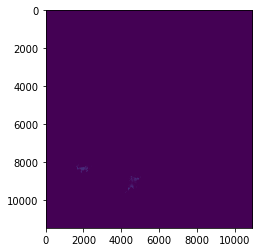

In [64]:
plt.imshow(rst.read(1))

In [65]:
np.unique(rst.read(1), return_counts=True)

(array([0, 1], dtype=uint8), array([125159633,     18287]))

In [ ]:
year =2010
df_gps = pd.read_csv('tmp/urban_{}_coords.txt'.format(year), names = ['lon','lat','on'])


In [62]:
df_gps.describe()


,lon,lat,on
count,2.125643e+06,2.125643e+06,2.125643e+06
mean,-9.023087e+01,1.577945e+01,3.606438e-03
std,1.160112e+00,1.177797e+00,5.994525e-02
min,-9.223885e+01,1.374083e+01,0.000000e+00
25%,-9.123625e+01,1.476014e+01,0.000000e+00
50%,-9.023087e+01,1.577945e+01,0.000000e+00
75%,-8.922549e+01,1.679876e+01,0.000000e+00
max,-8.822289e+01,1.781806e+01,1.000000e+00


In [63]:
df_gps=df_gps[df_gps['on']==1]

In [64]:
df_gps.describe()


,lon,lat,on
count,7666.000000,7666.000000,7666.0
mean,-90.736690,14.785047,1.0
std,0.668875,0.417600,0.0
min,-92.211081,13.854706,1.0
25%,-91.438993,14.571971,1.0
50%,-90.591918,14.674041,1.0
75%,-90.478049,14.876791,1.0
max,-88.572825,17.531992,1.0


In [65]:
eps_rad = 1 / kms_per_radian
df_clustered = dbscan_reduce(df_gps, epsilon=eps_rad)


Number of clusters: 516


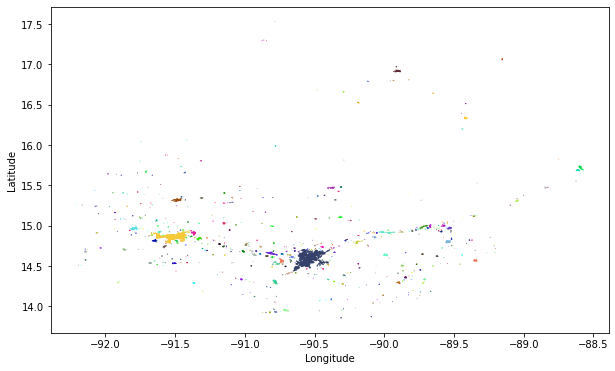

In [66]:

#Add a column of the number of cells in each cluster
df_clustered['cells'] = df_clustered['lat'].groupby(df_clustered['cluster']).transform('count')


#Write to CSV
df_clustered = df_clustered.sort_values(by=['lat', 'lon'])
df_clustered.to_csv('tmp/urban_{}_clustered.csv'.format(year), index = False)

visualise(df_clustered)

In [15]:
#!/bin/bash
try:
    os.mkdir('esa_urban')
except:
    FileExistsError
    
for f in [i for i in os.listdir() if 'urban_cluster_over' in i ]:
    print(f)
    cmd = f'gdal_proximity.py -distunits GEO {f} esa_urban/distance_to_{f}'
    os.system(cmd)


urban_cluster_over_20_cells_year_2011.tif
urban_cluster_over_50_cells_year_2011.tif
urban_cluster_over_100_cells_year_2011.tif
urban_cluster_over_200_cells_year_2011.tif
urban_cluster_over_10_cells_year_2015.tif
urban_cluster_over_20_cells_year_2015.tif
urban_cluster_over_50_cells_year_2015.tif
urban_cluster_over_100_cells_year_2015.tif
urban_cluster_over_200_cells_year_2015.tif
urban_cluster_over_10_cells_year_2001.tif
urban_cluster_over_20_cells_year_2001.tif
urban_cluster_over_50_cells_year_2001.tif
urban_cluster_over_100_cells_year_2001.tif
urban_cluster_over_200_cells_year_2001.tif
urban_cluster_over_10_cells_year_2006.tif
urban_cluster_over_20_cells_year_2006.tif
urban_cluster_over_50_cells_year_2006.tif
urban_cluster_over_100_cells_year_2006.tif
urban_cluster_over_200_cells_year_2006.tif
urban_cluster_over_10_cells_year_2011.tif


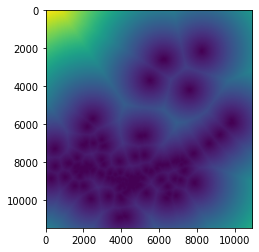

In [17]:
plt.imshow(rasterio.open(f'esa_urban/distance_to_{f}').read(1))